In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from network_tools import create_network, create_encoders
from iris_data_tools import read_iris_data, normalize_iris_data
from training_tools import train_all
from plotting_tools import plot_acc

iris_data_location = '../Data/Iris/iris.data'

In [3]:
#  create network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

iris_data, labels, classes, attributes = read_iris_data(iris_data_location, shuffle=False)

encoders = create_encoders(attributes)

neurons = create_network(n_neurons, n_synapses)
dpe_weights_start = np.random.rand(n_neurons, len(classes))

In [35]:

iris_data, labels, classes, attributes = read_iris_data(iris_data_location, shuffle=False)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

p = np.random.permutation(len(iris_data))
normalized_iris_data = normalized_iris_data[p]
# labels = labels[p]

average steady state t = 31.446666666666665


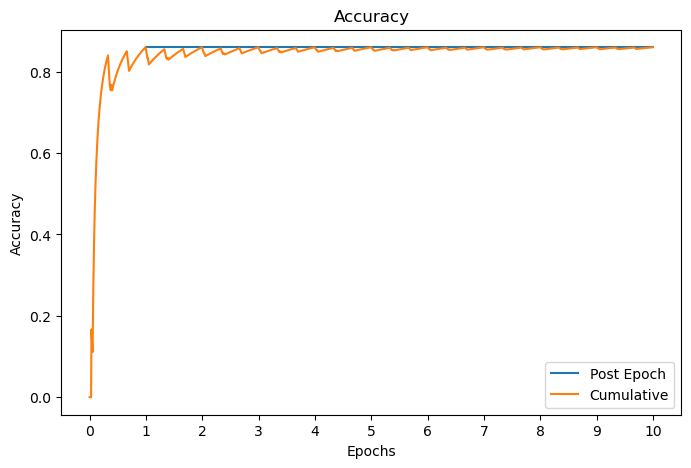

In [37]:
# create dpe weights
# dpe_weights = np.random.rand(n_neurons, len(classes))
dpe_weights = dpe_weights_start

n_epochs = 10
window_size = 10
sim_time = 100

E_t, avg_ss, c_acc = train_all(normalized_iris_data, labels, classes, neurons, encoders, dpe_weights, sim_time=sim_time, window_size=window_size, n_epochs=n_epochs)

print(f'average steady state t = {avg_ss}')

plot_acc(E_t, c_acc)


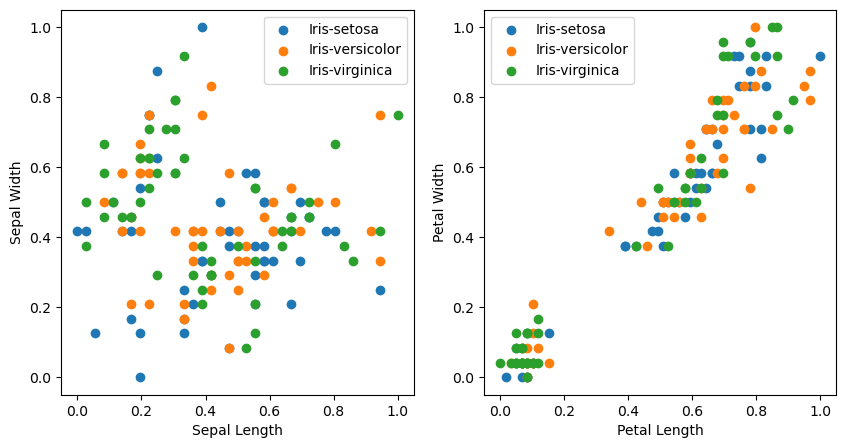

In [39]:
from plotting_tools import plot_iris_data
plot_iris_data(normalized_iris_data, classes, attributes, labels)

In [38]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
